In [1]:
!pip install category_encoders

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_parquet("multisim_dataset.parquet")  
df

,telephone_number,trf,age,gndr,tenure,age_dev,dev_man,device_os_name,dev_num,is_dualsim,...,val13_6,val14_6,val15_6,val16_6,val17_6,val18_6,val19_6,val20_6,val21_6,target
9626,iWBn_13aJO,J,50,M,6957.0,1263,Samsung,Android OS,1,1,...,0.000000,0.0,0.00,0.56,0.00,0.00,60.0,7.0,0.0,1
34347,8JWaD2wYoQ,M,52,M,1041.0,125,Samsung,Android OS,2,1,...,206.536585,0.0,0.40,0.00,0.16,0.24,156.0,0.0,2.0,1
72797,sbPnQURi3j,A,49,U,7176.0,345,Samsung,Android OS,1,1,...,0.000000,0.0,0.25,2.35,0.00,0.25,241.0,87.0,4.0,1
68025,qOy-JlqPTl,M,49,M,4309.0,466,Samsung,Android OS,1,1,...,51.885746,0.0,0.00,0.00,0.00,0.00,299.0,142.0,80.0,1
31781,MNODhcb7h0,A,50,U,6999.0,695,Samsung,Android OS,1,1,...,0.000000,0.0,0.00,0.80,0.00,0.00,121.0,96.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10237,vjo-T0Bkap,F,44,M,2047.0,1401,Samsung,Android OS,1,1,...,0.000000,0.0,0.18,1.50,0.00,0.09,108.0,18.0,2.0,0
81420,hr9U3_0kXW,G,39,U,4908.0,176,Apple,iOS,2,1,...,457.193839,0.0,0.24,2.24,0.00,0.24,98.0,23.0,1.0,0
19572,xw1HISdQiO,H,32,M,5317.0,1088,Samsung,Android OS,1,1,...,184.259022,0.0,5.82,7.16,4.44,1.38,256.0,54.0,61.0,0
81067,r5nxa5j2G0,D,43,U,6850.0,1418,Samsung,Android OS,1,1,...,0.000000,0.0,1.90,4.10,0.10,1.80,92.0,31.0,14.0,0


In [7]:
df.info(verbose=True)

#There are some numerical columns that are in object datatype.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 9626 to 90423
Data columns (total 132 columns):
 #    Column            Dtype  
---   ------            -----  
 0    telephone_number  object 
 1    trf               object 
 2    age               object 
 3    gndr              object 
 4    tenure            float64
 5    age_dev           object 
 6    dev_man           object 
 7    device_os_name    object 
 8    dev_num           object 
 9    is_dualsim        object 
 10   is_featurephone   object 
 11   is_smartphone     object 
 12   simcard_type      object 
 13   region            object 
 14   val2_1            float64
 15   val3_1            float64
 16   val4_1            int64  
 17   val5_1            float64
 18   val6_1            int64  
 19   val7_1            float64
 20   val8_1            int64  
 21   val9_1            float64
 22   val10_1           int64  
 23   val11_1           float64
 24   val12_1           float64
 25   val13_1          

In [9]:
ob_to_num = ['age', 'age_dev', 'dev_num', 'is_dualsim', 'is_featurephone', 'is_smartphone']

for col in ob_to_num:
    df[col] = pd.to_numeric(df[col])

In [11]:
df.describe()

,age,tenure,age_dev,dev_num,is_dualsim,is_featurephone,is_smartphone,val2_1,val3_1,val4_1,...,val13_6,val14_6,val15_6,val16_6,val17_6,val18_6,val19_6,val20_6,val21_6,target
count,9976.000000,9974.000000,9980.000000,9980.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,9728.000000,9728.000000,9.728000e+03,9.728000e+03,9.728000e+03,9.728000e+03,9728.000000,9728.000000,9728.000000,10000.000000
mean,44.653368,3705.959996,685.440581,1.698898,0.917700,0.124700,0.875300,12.236181,3.446700,83.165400,...,2028.914189,0.141146,8.848952e-01,1.577953e+00,3.542630e-01,4.751151e-01,185.486842,67.556127,20.955387,0.500000
std,23.155630,2662.023191,605.393003,1.671612,0.274835,0.330395,0.330395,16.818445,4.948314,161.116319,...,9118.745830,2.658871,2.040635e+00,2.878263e+00,1.045168e+00,1.238263e+00,259.493942,132.488722,49.859408,0.500025
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-6.183982e-08,-1.108646e-07,-3.352761e-08,-3.576279e-08,0.000000,0.000000,0.000000,0.000000
25%,34.000000,1256.250000,218.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,37.000000,3.000000,0.000000,0.000000
50%,43.000000,3022.500000,536.500000,1.000000,1.000000,0.000000,1.000000,6.000000,2.000000,26.000000,...,0.000000,0.000000,1.500000e-01,4.400000e-01,0.000000e+00,1.072884e-08,96.000000,20.000000,4.000000,0.500000
75%,55.000000,6261.000000,984.000000,2.000000,1.000000,0.000000,1.000000,16.000000,4.000000,85.000000,...,200.062908,0.000000,9.000000e-01,2.000000e+00,3.000000e-01,4.200000e-01,223.000000,67.000000,18.000000,1.000000
max,1941.000000,8978.000000,2860.000000,76.000000,1.000000,1.000000,1.000000,325.000000,90.000000,2628.000000,...,159548.365647,192.462886,4.920000e+01,5.918000e+01,3.464000e+01,2.886000e+01,4488.000000,1958.000000,1070.000000,1.000000


In [13]:
df["target"].value_counts()

#Target column is balanced

1    5000
0    5000
Name: target, dtype: int64

In [15]:
df.isnull().sum()

#There are lots of columns with nulls.

telephone_number      0
trf                   0
age                  24
gndr                  0
tenure               26
                   ... 
val18_6             272
val19_6             272
val20_6             272
val21_6             272
target                0
Length: 132, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

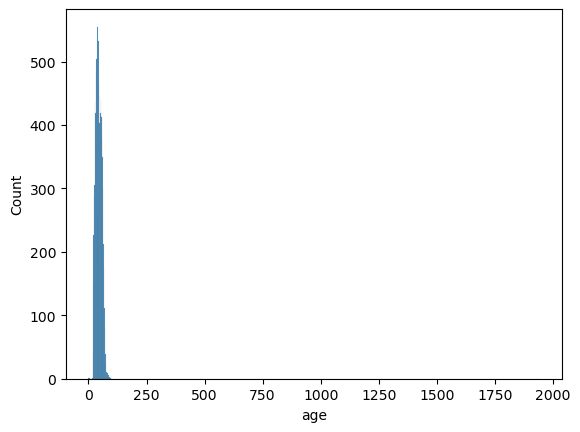

In [17]:
sns.histplot(df["age"])

<Axes: xlabel='age'>

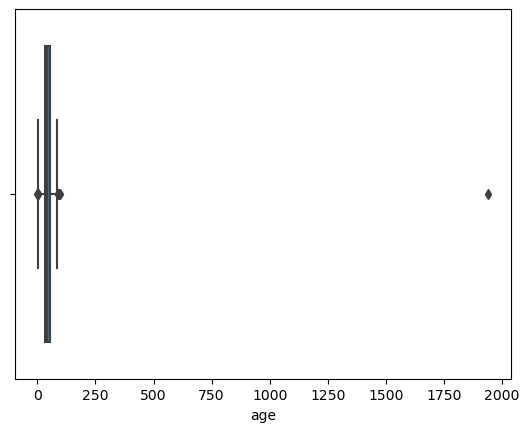

In [19]:
sns.boxplot(x=pd.to_numeric(df['age']))

In [21]:
df["age"].max()

#It seems there is a value in age column, not age but birthyear.

1941.0

In [23]:
df.loc[df['age'] == 1941, 'age'] = 2025 - 1941

<Axes: xlabel='age', ylabel='Count'>

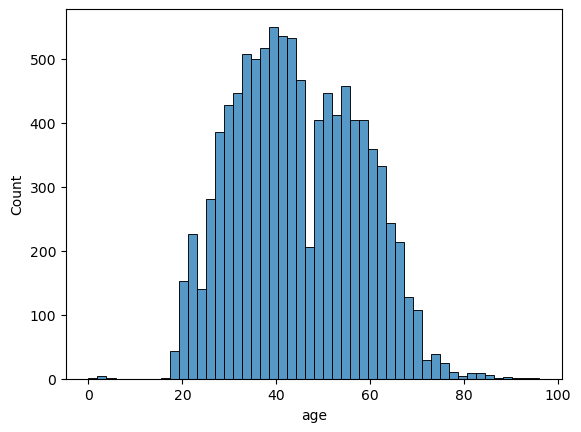

In [25]:
sns.histplot(df["age"])

#Age column is normally distributed.

<Axes: xlabel='tenure', ylabel='Count'>

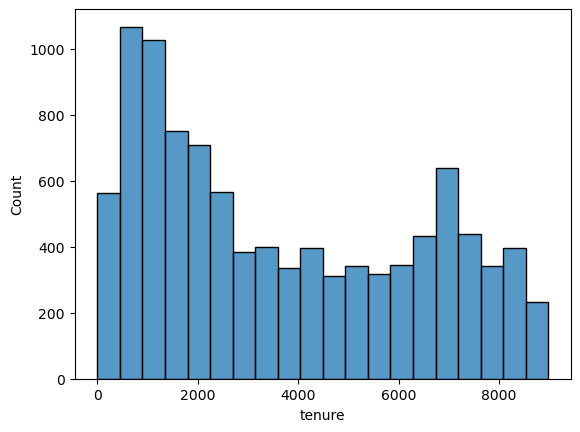

In [27]:
sns.histplot(df["tenure"])

#This column a positively skewed, multimodal distribution

<Axes: xlabel='age_dev', ylabel='Count'>

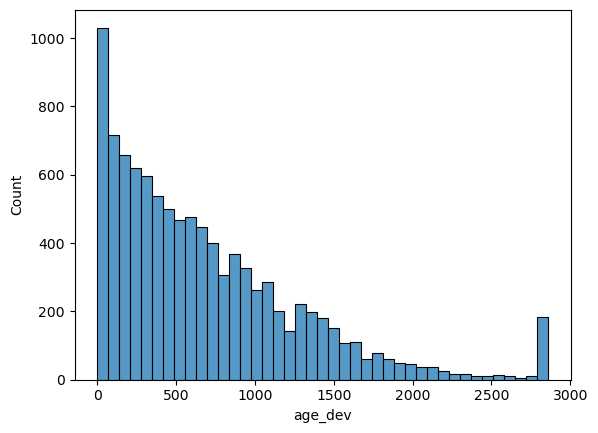

In [29]:
sns.histplot(df["age_dev"])

#Follows right skewness

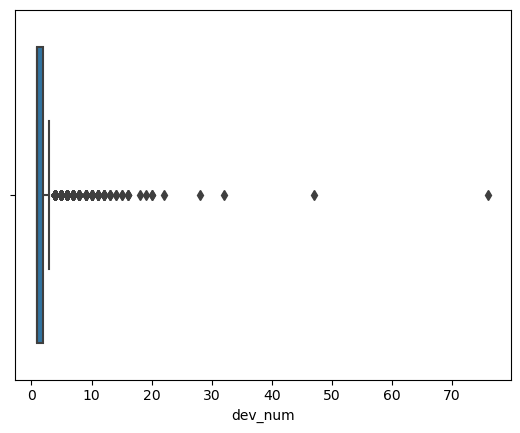

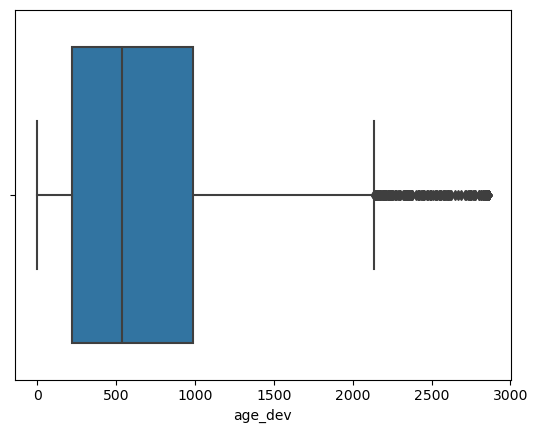

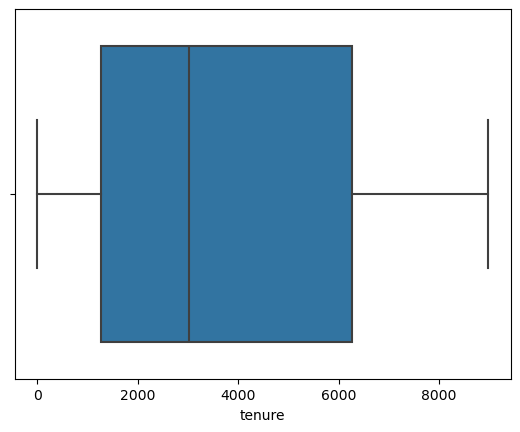

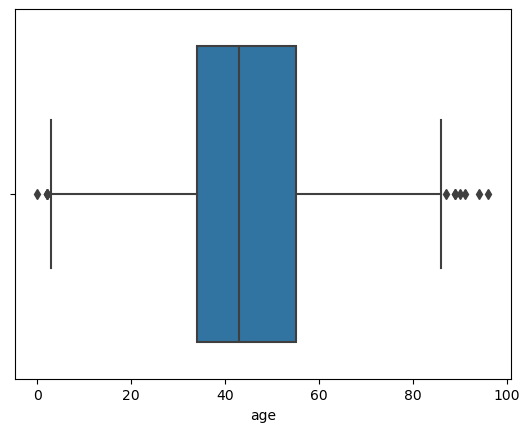

In [31]:
cols=['dev_num','age_dev','tenure','age']
for col in cols:
    sns.boxplot(x=(df[col]))
    plt.show()


#Except tenure variable, others have outliers, dev_num and age_dev columns have lots of extreme values

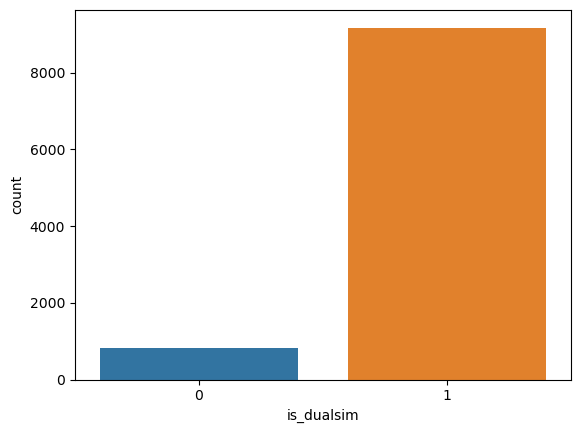

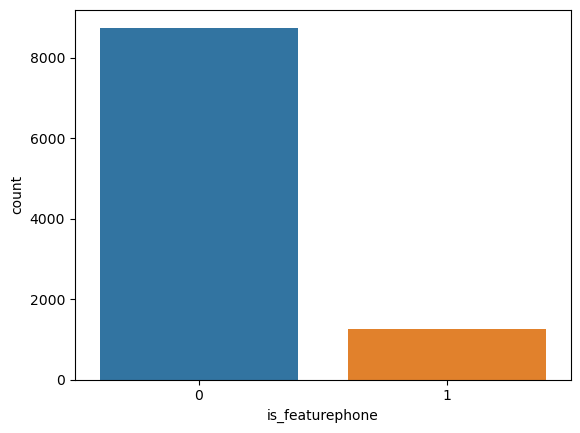

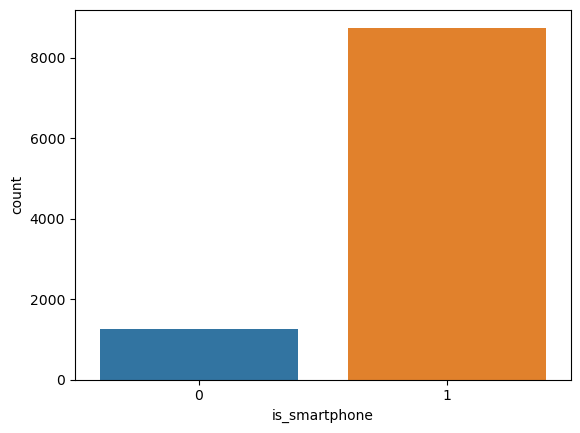

In [33]:
cols=['is_dualsim','is_featurephone','is_smartphone']
for c in cols:
    sns.countplot(x=df[c])
    plt.show()

#It's obvious that distincly most of the devices can hold 2 simcards.
#And number of smartphones are way more than featurephones.

<Axes: xlabel='gndr', ylabel='count'>

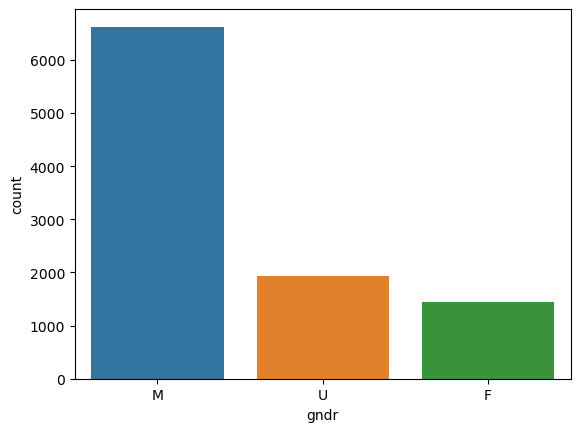

In [35]:
sns.countplot(x=df["gndr"])

#In the dataset number of males are dominant.

<Axes: xlabel='trf', ylabel='count'>

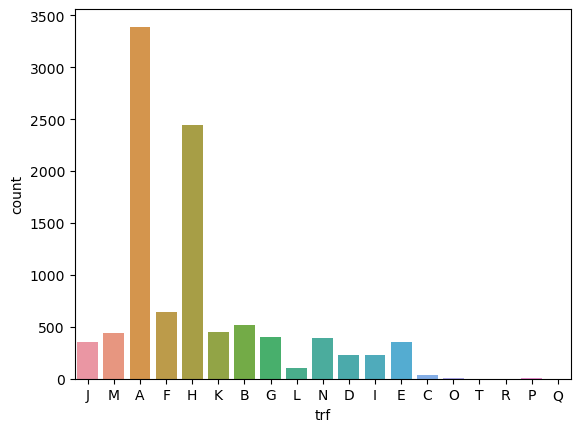

In [37]:
sns.countplot(x=df["trf"])

#most of the customers use tariff A followed by H. Others are used nearly by the same number of people.

<Axes: xlabel='dev_man', ylabel='count'>

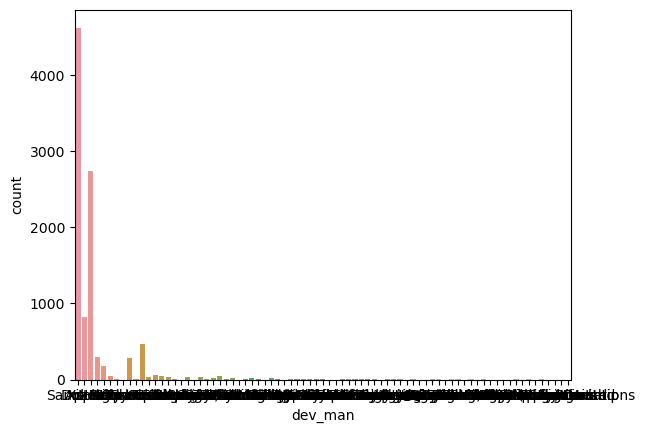

In [39]:
sns.countplot(x=df["dev_man"])

In [41]:
df["dev_man"].value_counts().head(10)

#Number of people who use Samsung exceed others markedly, being nearly twofold of Xiaomi users, followed by Apple.

Samsung          4623
Xiaomi           2738
Apple             825
Hmd Global Oy     464
Nokia             294
Huawei            277
Honor             174
Realme             60
Hedy               52
F-Plus             45
Name: dev_man, dtype: int64

<Axes: xlabel='device_os_name', ylabel='count'>

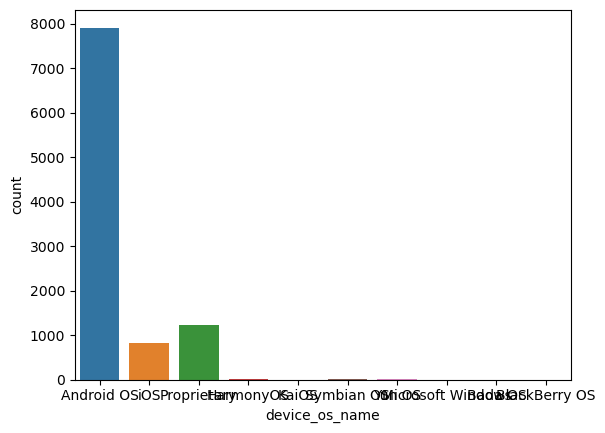

In [43]:
sns.countplot(x=df["device_os_name"])

<Axes: xlabel='simcard_type', ylabel='count'>

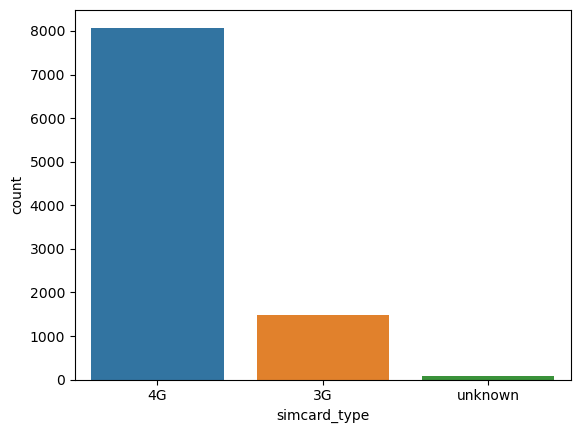

In [45]:
sns.countplot(x=df["simcard_type"])

#4G is the most used simcard type, used by nearly 8000 people.

<Axes: xlabel='target', ylabel='tenure'>

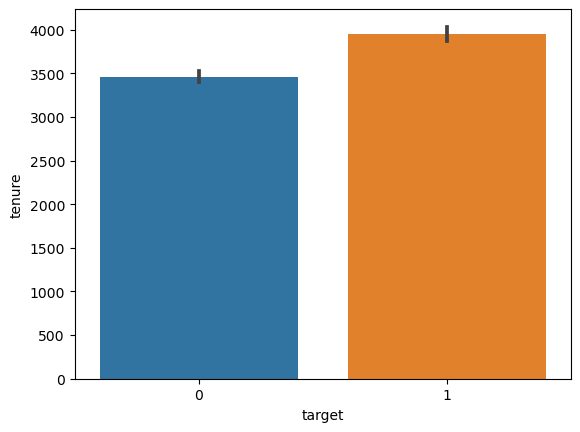

In [47]:
sns.barplot(data=df,x='target',y='tenure')

#The average tenure is slightly higher in the multisimmers.

In [49]:
pd.crosstab(index=df["target"],columns=df["gndr"])

gndr,F,M,U
target,,,
0,914,3237,849
1,535,3387,1078


AttributeError: 'numpy.int64' object has no attribute 'startswith'

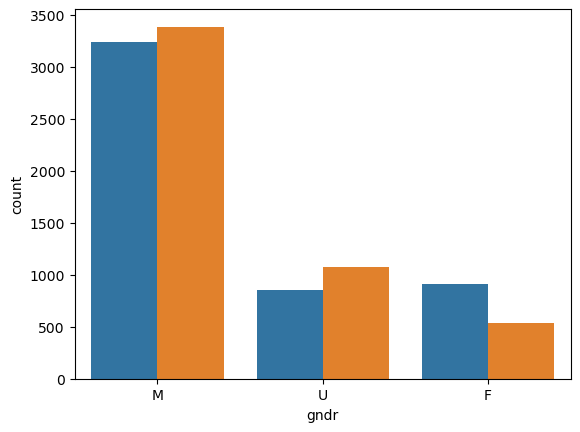

In [51]:
sns.countplot(x='gndr', hue='target', data=df)

#Nearly half of the males are multisimmers, but most of the females are not.

<Axes: xlabel='trf', ylabel='tenure'>

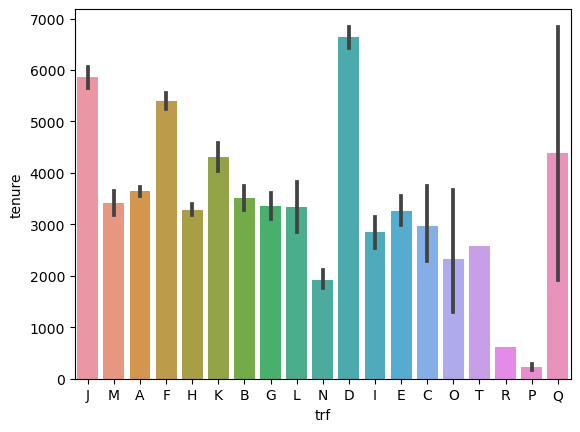

In [54]:
sns.barplot(data=df, x=df["trf"],y=df['tenure'])

#Tariff D has the highest average tenure (about 6800 days), meaning customers have been with the company for a long time.
#Tariff P has a very low average tenure (~100 days), meaning customers are mostly new.
#Plans J and A also have long-tenured customers.

<Axes: xlabel='gndr', ylabel='tenure'>

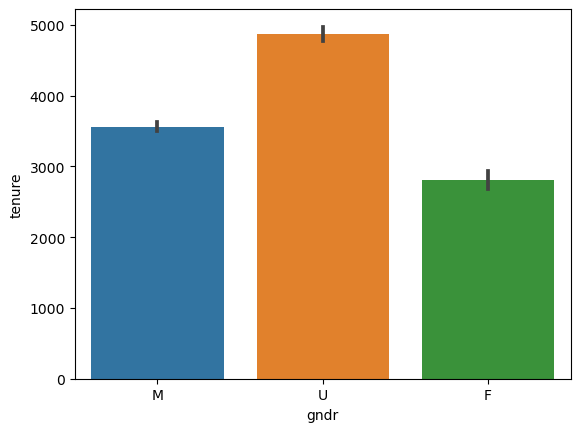

In [56]:
sns.barplot(data=df, x=df["gndr"],y=df['tenure'])


#Customers with unknown gender type have the highest average tenure, followed by males, while females have the lowest.

<Axes: xlabel='simcard_type', ylabel='tenure'>

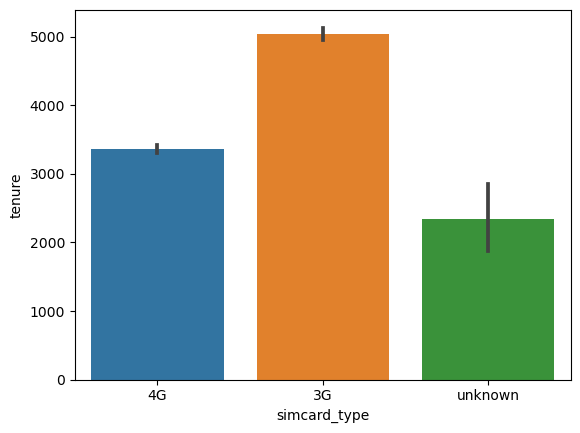

In [58]:
sns.barplot(data=df, x=df["simcard_type"],y=df['tenure'])


#3G simcard users are the oldest customers, followed by 4G users, on around 3300 days.

In [60]:
df=df.set_index("telephone_number")
df.head()

,trf,age,gndr,tenure,age_dev,dev_man,device_os_name,dev_num,is_dualsim,is_featurephone,...,val13_6,val14_6,val15_6,val16_6,val17_6,val18_6,val19_6,val20_6,val21_6,target
telephone_number,,,,,,,,,,,,,,,,,,,,,
iWBn_13aJO,J,50.0,M,6957.0,1263.0,Samsung,Android OS,1.0,1,0,...,0.000000,0.0,0.00,0.56,0.00,0.00,60.0,7.0,0.0,1
8JWaD2wYoQ,M,52.0,M,1041.0,125.0,Samsung,Android OS,2.0,1,0,...,206.536585,0.0,0.40,0.00,0.16,0.24,156.0,0.0,2.0,1
sbPnQURi3j,A,49.0,U,7176.0,345.0,Samsung,Android OS,1.0,1,0,...,0.000000,0.0,0.25,2.35,0.00,0.25,241.0,87.0,4.0,1
qOy-JlqPTl,M,49.0,M,4309.0,466.0,Samsung,Android OS,1.0,1,0,...,51.885746,0.0,0.00,0.00,0.00,0.00,299.0,142.0,80.0,1
MNODhcb7h0,A,50.0,U,6999.0,695.0,Samsung,Android OS,1.0,1,0,...,0.000000,0.0,0.00,0.80,0.00,0.00,121.0,96.0,0.0,1


In [62]:
df[['is_smartphone',"is_featurephone"]].corr()

#is_featurephone is opposite of is_smartphone, we can delete one of them.

,is_smartphone,is_featurephone
is_smartphone,1.0,-1.0
is_featurephone,-1.0,1.0


In [64]:
df=df.drop("is_featurephone",axis=1)